In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('uber.csv')

In [ ]:
df=data.copy()

In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
df.dtypes


Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [ ]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

change type of pickup_datetime

In [ ]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [ ]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

correlation matrix

In [ ]:
df.corr()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000589,0.000230,-0.000341,0.000270,0.000271,0.002257
fare_amount,0.000589,1.000000,0.010457,-0.008481,0.008986,-0.011014,0.010150
pickup_longitude,0.000230,0.010457,1.000000,-0.816461,0.833026,-0.846324,-0.000414
pickup_latitude,-0.000341,-0.008481,-0.816461,1.000000,-0.774787,0.702367,-0.001560
dropoff_longitude,0.000270,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,0.000271,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.002257,0.010150,-0.000414,-0.001560,0.000033,-0.000659,1.000000


Plots

<Axes: xlabel='fare_amount', ylabel='Density'>

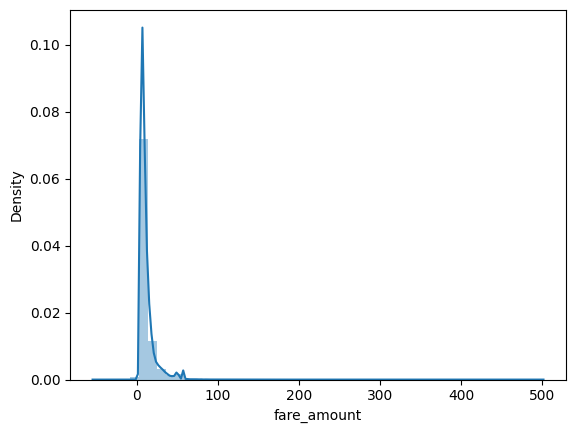

In [ ]:
sns.distplot(df['fare_amount'])

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

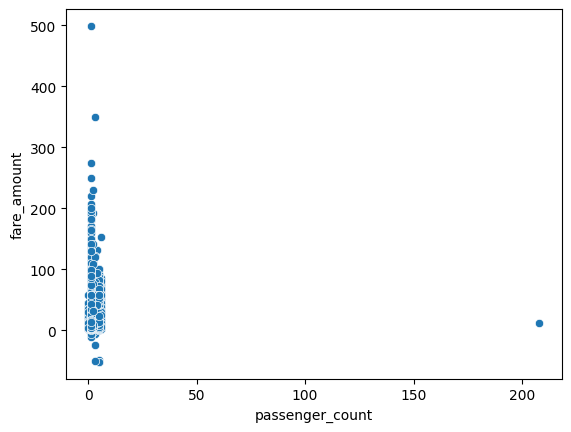

In [ ]:
sns.scatterplot(y=df['fare_amount'],x=df['pickup_longitude'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbecfd2d480>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbecfd2dc00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbecfd2d7e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbecfd2f1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbecfd2eb90>],
 'means': []}

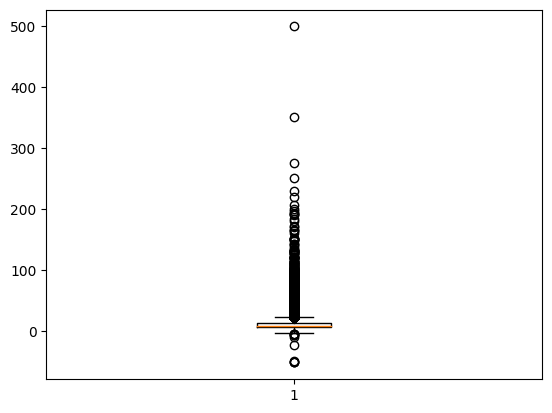

In [ ]:
plt.boxplot(df['fare_amount'])

In [ ]:
df.shape

(200000, 9)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(199999, 9)

Remove outliers

In [ ]:
q_low=df['fare_amount'].quantile(0.01)
q_high=df['fare_amount'].quantile(0.99)
df=df[(df['fare_amount']<q_high) & (df['fare_amount']>q_low)]

In [ ]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

Models

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop("fare_amount",axis=1)
y=df['fare_amount']

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2, random_state=1)

In [ ]:
x['pickup_datetime'] = pd.to_numeric(pd.to_datetime(x['pickup_datetime']))
x = x.loc[:, x.columns.str.contains('^Unnamed')]


KeyError: ignored

In [ ]:
# print(y.columns)
# print(x.head())
print(df.columns)

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [ ]:
xx=df.drop("fare_amount",axis=1)
yy=df['fare_amount']

In [ ]:
print(xx.columns)

Index(['Unnamed: 0', 'key', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')


In [ ]:
xx['pickup_datetime']=pd.to_numeric(pd.to_datetime(xx['pickup_datetime']))
xx=xx.loc[:,xx.columns.str.contains('^Unnamed')]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(xx,yy,test_size=0.2,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
# prediction
y_pred=lr.predict(x_test)

In [ ]:
# check erorr rmse


In [ ]:
from sklearn.metrics import mean_squared_error
lrrsme = np.sqrt(mean_squared_error(y_pred,y_test))
print("RMSE error for the model is ", lrrsme)


RMSE error for the model is  8.063863046328835


random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100, random_state=101)

In [ ]:
rf.fit(x_train,y_train)
pred_y=rf.predict(x_test)

In [ ]:
rsme=np.sqrt(mean_squared_error(pred_y,y_test))
print("RMSE value for Random Forest is:",rsme)


RMSE value for Random Forest is: 9.757713738069647


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# print(accuracy_score(y_pred,y_test))
# accuracy --.classification madhe asta..not in regression

In [ ]:
#